# Overskrift

<ul>
<li>Rense data
<li>Display data
<li>Kanskje finne noen pakker som støtter adx og de der?
<li>Sette indikatorverktøy i egne py filer


In [1]:
import warnings
import pandas as pd
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

import matplotlib.pyplot as plt
import plotly.express as px
import stockstats
import sys
import os
import statistics

from lib.rens import rens
from lib.god_runde import positiv_utvikling



In [4]:
def hent_indikatortall(data, gode):
    stock = stockstats.StockDataFrame.retype(data)
    indikatorer = ['rsi_20', 'trix', 'open_8_sma', 'open_16_sma', 'macds']
    for ind in indikatorer:
        stock.get(ind)

    all_indikator = {ind:[] for ind in indikatorer}

    for ix, fin in gode.iterrows():
        oppgang = stock[int(fin.start):int(fin.endex)]     
        for ind in all_indikator:
            all_indikator[ind].append(oppgang[ind].values)
    
    return all_indikator

def multi_analyse(filer):
    alle_gode = pd.DataFrame(columns=['navn'])

    for i, fil in enumerate(filer):
        print(f"{i+1} av {len(filer)} analysert" ,end='\r')
        data = cleanup.clean_data(pd.read_excel(fil))
        gode = pos_ut.calculate(data)
        alle_indikatorer = hent_indikatortall(data, gode)
        for ind in alle_indikatorer:
            gode[ind] = alle_indikatorer[ind]
            
        gode['navn'] = fil.split('/')[1].split('.xl')[0]
        alle_gode = alle_gode.append(gode, ignore_index=True)
               
    return alle_gode


def add_data(word):
    ordet = 'data/' + word
    return ordet

In [5]:
cleanup = rens()
pos_ut = positiv_utvikling()

In [6]:
filer = list(map(add_data, os.listdir('data/')))[:10]
data = multi_analyse(filer)
data['sma8-16'] = [data.open_8_sma[i] - data.open_16_sma[i] for i, value in enumerate(data.open_8_sma)]
data

NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


,navn,start,endex,start_pris,slutt_pris,oppgang,score,rsi_20,trix,open_8_sma,open_16_sma,macds,sma8-16
0,Aker 02.04.2020,128.0,186.0,240.20,247.80,3.164030,50.703007,"[33.81243254968905, 33.81243254968905, 38.6569...","[-0.04397465516493707, -0.045443866319610726, ...","[241.0750000000002, 240.9750000000002, 240.950...","[241.77500000000003, 241.6125, 241.47500000000...","[-0.7287504097325816, -0.7451481517388542, -0....","[-0.6999999999998465, -0.6374999999998181, -0...."
1,Aker 02.04.2020,229.0,267.0,245.80,249.60,1.545972,31.951273,"[50.71615637249463, 47.90096406491234, 47.9009...","[-0.010354636272359287, -0.009138505674278392,...","[245.27500000000046, 245.32500000000044, 245.3...","[245.4375000000002, 245.4750000000002, 245.512...","[-0.21239923294784613, -0.19739665579452376, -...","[-0.16249999999973852, -0.1499999999997499, -0..."
2,Aker 30.04.2020,58.0,106.0,267.80,272.60,1.792382,36.304068,"[39.67111865884208, 39.17672236892631, 38.6694...","[-0.10058224660774777, -0.0966240136151853, -0...","[267.25, 267.09999999999997, 267.0999999999999...","[268.4249999999998, 268.3499999999998, 268.249...","[-1.7621945819520486, -1.7223674741857025, -1....","[-1.174999999999784, -1.2499999999998295, -1.1..."
3,Aker 30.04.2020,118.0,159.0,270.40,273.60,1.183432,30.083060,"[48.123898874117444, 49.52600847498533, 53.495...","[-0.004073298420161102, -0.006143478019842823,...","[270.22499999999985, 270.29999999999984, 270.4...","[271.12499999999983, 271.03749999999985, 270.9...","[0.061652168278914544, 0.02892586375705228, 0....","[-0.8999999999999773, -0.7375000000000114, -0...."
4,Aker 31.03.2020,41.0,70.0,227.80,235.00,3.160667,29.493962,"[47.55734379453681, 49.10491214742308, 47.6255...","[-0.04210342809995147, -0.04285742782661868, -...","[227.49999999999997, 227.47499999999997, 227.3...","[228.41250000000005, 228.35000000000005, 228.3...","[-0.45564843789836923, -0.47301410008353206, -...","[-0.9125000000000796, -0.8750000000000853, -0...."
5,Aker 31.03.2020,112.0,142.0,232.80,235.00,0.945017,24.096609,"[47.36172689163056, 43.825070640844395, 50.617...","[-0.04267460755521606, -0.04193714503093347, -...","[232.34999999999997, 232.37499999999997, 232.5...","[232.82500000000005, 232.70000000000005, 232.7...","[-0.4568032144150203, -0.46607928971840773, -0...","[-0.4750000000000796, -0.3250000000000739, -0...."
6,Aker 31.03.2020,279.0,313.0,229.00,233.40,1.921397,27.159496,"[39.788251937614454, 42.89453467747394, 42.894...","[-0.0495834858690581, -0.047488407764097115, -...","[228.87499999999986, 228.87499999999983, 228.8...","[229.31250000000003, 229.30000000000004, 229.3...","[-0.7542320347922611, -0.7363138158583081, -0....","[-0.43750000000017053, -0.4250000000002103, -0..."
7,Aker BP 20.08.2020,163.0,207.0,175.15,176.75,0.913503,28.551216,"[52.614410878664444, 50.49169578004401, 50.491...","[0.0038925265723230265, 0.0032561865549406246,...","[175.125, 175.10625, 175.10625, 175.10625, 175...","[175.15937499999998, 175.15624999999997, 175.1...","[0.04339675217064662, 0.03901491654944172, 0.0...","[-0.03437499999998295, -0.04999999999998295, -..."
8,Aker BP 27.04.2020,21.0,61.0,154.00,155.45,0.941558,27.912907,"[51.13648908828135, 46.53724332213418, 44.7711...","[-0.014545718565755279, -0.014296135121243381,...","[153.5, 153.53125, 153.4625, 153.4874999999999...","[153.7, 153.63125, 153.58125, 153.540625, 153....","[-0.07021064141847043, -0.07129453438168222, -...","[-0.19999999999998863, -0.09999999999999432, -..."
9,Aker BP 29.04.2020,36.0,78.0,159.45,164.15,2.947632,34.597741,"[43.71824202124468, 48.78749808747356, 49.6553...","[-0.026287386371428013, -0.027061119126633993,...","[159.74375, 159.73125000000002, 159.68125, 159...","[160.00312499999993, 160.00312499999993, 159.9...","[-0.18963377788574767, -0.1990575001083057, -0...","[-0.2593749999999204, -0.27187499999990905, -0..."


In [36]:
data_oppgang = data[data.oppgang > 0.9]
data_oppgang = data_oppgang[data_oppgang.score > 30]
data_oppgang = data_oppgang.reset_index(drop=True)

In [123]:
indikatorer = [colm for colm in data_oppgang.columns[7:]]
statestikk_df = pd.DataFrame(columns=indikatorer, index=['mean', 'stdv', 'upper', 'lower'])
for ind in indikatorer: # skal hente ut snittet pr for hver

    means = []
    stdv = []
    longest = max(data_oppgang[ind], key=len)
    for i in range(len(longest)):
        samlet_verdier = [data_oppgang[ind][j][i]for j in range(len(data_oppgang[ind])) if len(data_oppgang[ind][j]) > i]

        print(samlet_verdier)
        means.append(statistics.mean(samlet_verdier))
        stdv.append(statistics.stdev(samlet_verdier)) if len(samlet_verdier)>1 else stdv.append(0)
  

    statestikk_df[ind]['mean'] = means
    statestikk_df[ind]['stdv'] = std
    statestikk_df[ind]['upper'] = [statestikk_df[ind]['mean'][i] + statestikk_df[ind]['stdv'][i]*2
                                    for i in range(len(statestikk_df[ind]['mean']))]
    statestikk_df[ind]['lower'] = [statestikk_df[ind]['mean'][i] - statestikk_df[ind]['stdv'][i]*2
                                    for i in range(len(statestikk_df[ind]['mean']))]

statestikk_df

[33.81243254968905, 50.71615637249463, 39.67111865884208, 48.123898874117444, 43.71824202124468, 39.28638402164819, 48.469794160419035, 52.0789409300997]
[33.81243254968905, 47.90096406491234, 39.17672236892631, 49.52600847498533, 48.78749808747356, 41.0404983404407, 49.26645625114961, 54.52131984254919]
[38.6569008207169, 47.90096406491234, 38.66944545884845, 53.49526744997842, 49.65534603485425, 40.792380930325606, 46.25545056179007, 53.56344173171308]
[43.045014182687666, 47.90096406491234, 42.58243060160576, 50.69748869699826, 47.133078755877726, 44.334837155433895, 48.72926681065282, 52.59085021973359]
[48.241491209536555, 47.90096406491234, 44.80649287633348, 53.27007236269042, 46.7167628737111, 41.46240076431238, 47.95476942069501, 57.46839652912386]
[51.71917136317731, 49.61774514513897, 46.267080817069036, 51.846223179207186, 53.238367794867415, 42.17937212987132, 46.402116923887185, 57.46839652912386]
[50.52794403311498, 51.306748085137066, 47.00518807163123, 46.6015606234310

[243.25000000000023, 246.87500000000057, 269.82500000000005, 271.34999999999997, 162.13125000000002, 167.5875, 128.69375, 499.98750000000007]
[243.27500000000023, 247.20000000000059, 269.75, 271.19999999999993, 162.18750000000003, 167.61875, 128.725, 501.12500000000006]
[243.37500000000023, 247.5750000000006, 269.75, 271.1499999999999, 162.23125000000002, 167.6375, 128.725, 501.925]
[243.47500000000025, 247.8750000000006, 269.8, 271.19999999999993, 162.3375, 167.6625, 128.78125, 502.61249999999995]
[243.62500000000023, 248.17500000000058, 269.875, 271.2749999999999, 162.38750000000002, 167.65, 128.84375, 503.38749999999993]
[243.7500000000002, 248.3500000000006, 269.97499999999997, 271.3749999999999, 162.4625, 167.55, 128.89374999999998, 504.24999999999994]
[243.7750000000002, 248.45000000000059, 269.97499999999997, 271.3999999999999, 162.56875, 167.4875, 128.96874999999997, 504.5]
[243.9000000000002, 248.5250000000006, 269.99999999999994, 271.4749999999999, 162.68125, 167.49375, 129.0

[0.9875000000001819, 0.20000000000038654, 0.9875000000001819, 0.30000000000012506, 0.790625000000091, 0.3406250000000455, 0.15624999999994316, 0.9750000000000796]
[0.9125000000001933, 0.20000000000044338, 0.8500000000001933, 0.2625000000001023, 0.8562500000000739, 0.3406250000000455, 0.1749999999999261, 1.150000000000091]
[0.875000000000199, 0.2375000000004377, 0.6500000000002046, 0.3375000000001478, 0.9218750000000568, 0.45625000000001137, 0.16249999999993747, 1.3125000000001137]
[0.8125000000002274, 0.32500000000041496, 0.5875000000002046, 0.3250000000001023, 0.9343750000000455, 0.47187500000001137, 0.1687499999999318, 1.7687500000000114]
[0.5750000000001876, 0.4375000000003979, 0.47500000000019327, 0.22500000000002274, 0.8812500000000227, 0.4156250000000057, 0.16249999999993747, 2.099999999999966]
[0.40000000000020464, 0.6125000000003809, 0.40000000000020464, 0.12500000000005684, 0.825000000000017, 0.39687500000002274, 0.16562499999992042, 2.618750000000034]
[0.2625000000002444, 0.7

,rsi_20,trix,open_8_sma,open_16_sma,macds,sma8-16
mean,"[44.48462094856935, 45.50398749751576, 46.1236...","[-0.03243678307079837, -0.032147415085464315, ...","[246.48984375000006, 246.46796875000007, 246.4...","[246.99804687499997, 246.97031249999998, 246.9...","[-0.42211399107286246, -0.42252339872902983, -...","[-0.5082031249998948, -0.5023437499999162, -0...."
stdv,"[0.49884615049515574, 0.4477521673294267, 0.36...","[0.49884615049515574, 0.4477521673294267, 0.36...","[0.49884615049515574, 0.4477521673294267, 0.36...","[0.49884615049515574, 0.4477521673294267, 0.36...","[0.49884615049515574, 0.4477521673294267, 0.36...","[0.49884615049515574, 0.4477521673294267, 0.36..."
upper,"[45.48231324955966, 46.39949183217461, 46.8448...","[0.9652555179195131, 0.863356919573389, 0.6900...","[247.48753605099037, 247.36347308465892, 247.1...","[247.99573917599028, 247.86581683465883, 247.6...","[0.575578309917449, 0.47298093592982354, 0.304...","[0.48948917599041664, 0.3931605846589372, 0.28..."
lower,"[43.48692864757904, 44.608483162856906, 45.402...","[-1.03012908406111, -0.9276517497443177, -0.75...","[245.49215144900975, 245.57246441534122, 245.7...","[246.00035457400966, 246.07480816534112, 246.1...","[-1.419806292063174, -1.3180277333878831, -1.1...","[-1.5058954259902064, -1.3978480846587695, -1...."


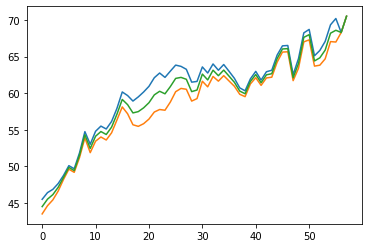

In [112]:
#for i in statestikk_df['rsi_20']:
#    print(i)
#    break
plt.plot(statestikk_df['rsi_20']['upper'])
plt.plot(statestikk_df['rsi_20']['lower'])
plt.plot(statestikk_df['rsi_20']['mean'])

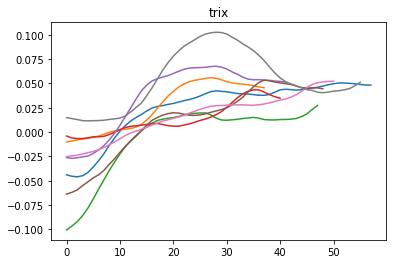

In [122]:
fig = plt.figure
plt.title('trix')
for i in data_oppgang.trix:
    plt.plot(i)
#plt.savefig('images/trixplot_2')

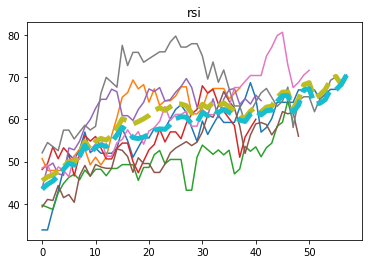

In [121]:
fig = plt.figure
plt.title('rsi')
for i in data_oppgang.rsi_20:
    plt.plot(i)
#plt.savefig('images/rsiplot_2')

plt.plot(statestikk_df['rsi_20']['upper'], '--' ,linewidth=5)
plt.plot(statestikk_df['rsi_20']['lower'], '--' ,linewidth=5)
#plt.plot(statestikk_df['rsi_20']['mean'])

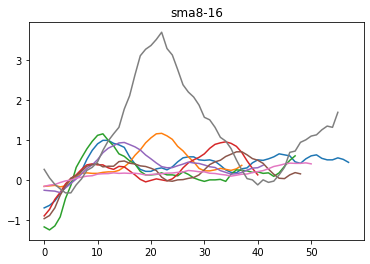

In [24]:
fig = plt.figure
plt.title('sma8-16')
for i in data_oppgang['sma8-16']:
    plt.plot(i)
plt.savefig('images/sma8-16plot_2')

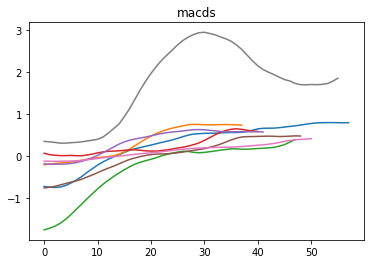

In [25]:
fig = plt.figure
plt.title('macds')
for i in data_oppgang['macds']:
    plt.plot(i)
plt.savefig('images/macdsplot_2')

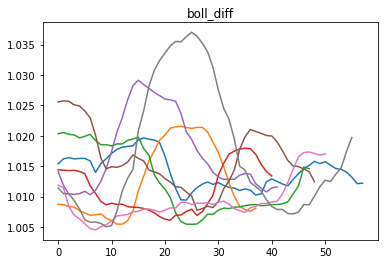

In [20]:
fig = plt.figure
plt.title('boll_diff')
for i in data_oppgang['boll_diff']:
    plt.plot(i)
#plt.savefig('images/tplot')